In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.dropna(inplace=True)
df.sample(5)


Survived   Age    Fare
812         0  35.0  10.500
340         1   2.0  26.000
636         0  32.0   7.925
661         0  40.0   7.225
213         0  30.0  13.000

In [16]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [56]:
k_bin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy="quantile")
k_bin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy="quantile")
k_bin_age_trans=k_bin_age.fit_transform(df[["Age"]])
k_bin_fare_trans=k_bin_fare.fit_transform(df[["Fare"]])
print("Fare Bin Edges:")
print(np.round(k_bin_fare.bin_edges_[0], 2))  # [0] because it's a list with 1D array

print("\nAge Bin Edges:")
print(np.round(k_bin_age.bin_edges_[0], 2))

Fare Bin Edges:
[  0.     7.75   7.91   9.2   13.    15.74  26.    29.12  46.9   79.52
 512.33]

Age Bin Edges:
[ 0.42 14.   19.   22.   25.   28.   31.8  36.   41.   50.   80.  ]


In [57]:
def discretize(n,stgy):
    k_bin_age=KBinsDiscretizer(n_bins=n,encode='ordinal',strategy=stgy)
    k_bin_fare=KBinsDiscretizer(n_bins=n,encode='ordinal',strategy=stgy)

    trf=ColumnTransformer(
        transformers=[
        ("age",k_bin_age,[1]),
        ("fare",k_bin_fare,[2])]
        ,
        remainder="passthrough"
    )

    df_disc=trf.fit_transform(df)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    axes[0].set_title("Before discretization Fare")
    axes[0].hist(df["Fare"])
    
    
    axes[1].set_title("After discretization fare")
    axes[1].hist(df_disc[:,1])
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].set_title("Before discretization Age")
    axes[0].hist(df["Age"])
    
    axes[1].set_title("After discretization Age")
    axes[1].hist(df_disc[:,0])
    plt.show()


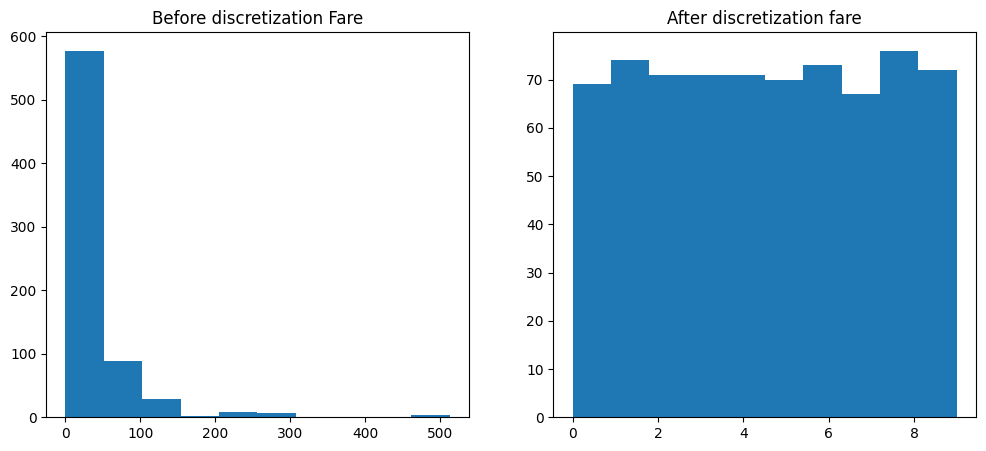

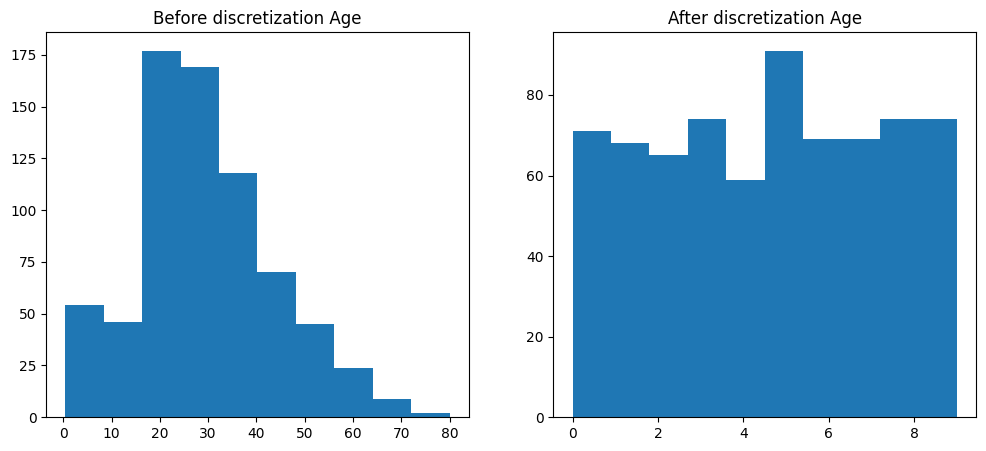

Fare Bin Edges:


AttributeError: 'KBinsDiscretizer' object has no attribute 'bin_edges_'

In [54]:
discretize(10,"quantile")

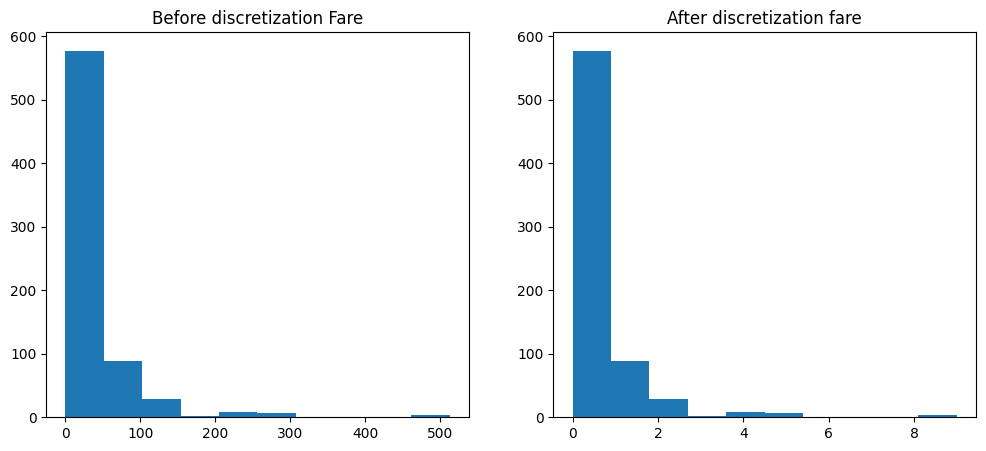

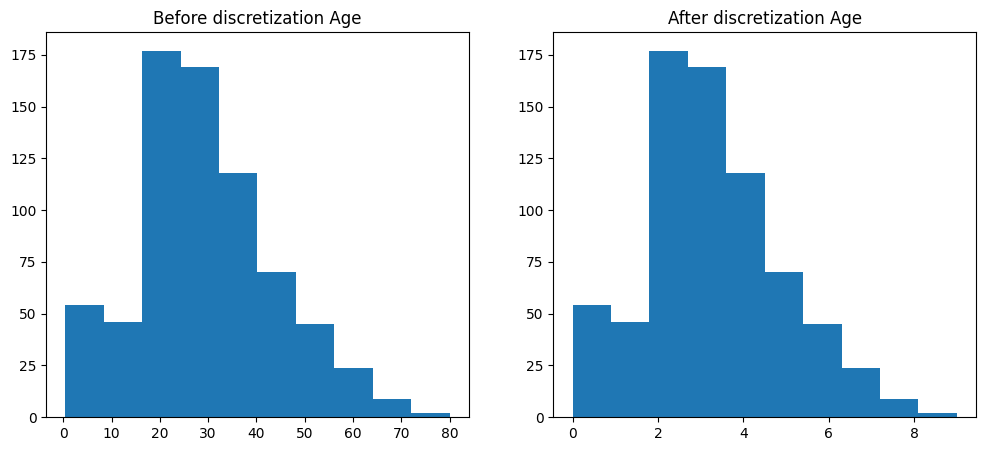

In [46]:
discretize(10,"uniform")

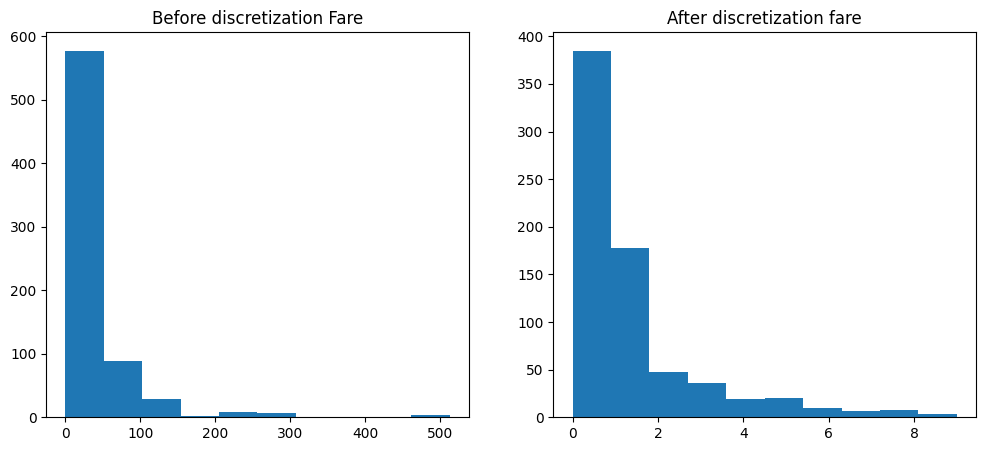

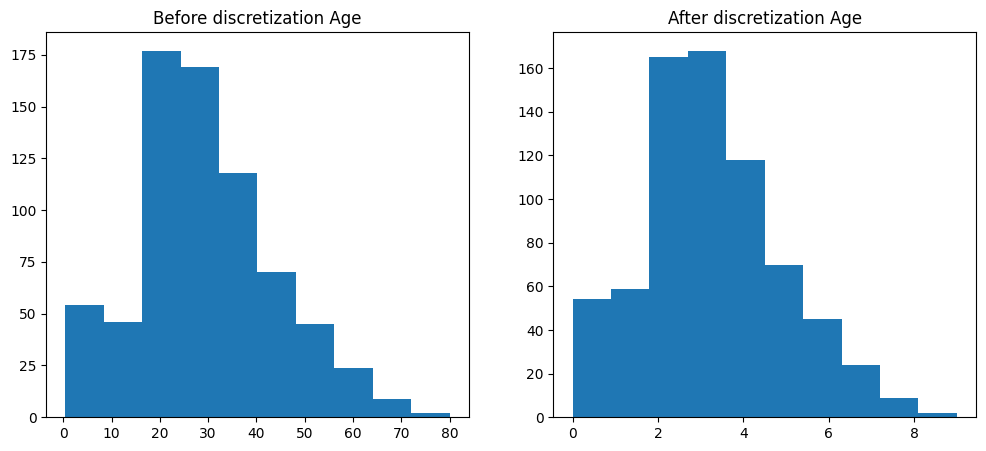

In [47]:
discretize(10,"kmeans")

# Binarisation

In [73]:
from sklearn.preprocessing import Binarizer

bn=Binarizer(threshold=20,copy=True)
# values less than threshold will get 0 other will get 1

In [72]:
df_N=bn.fit_transform(df[["Fare"]])
df

Survived   Age     Fare
0           0  22.0   7.2500
1           1  38.0  71.2833
2           1  26.0   7.9250
3           1  35.0  53.1000
4           0  35.0   8.0500
..        ...   ...      ...
885         0  39.0  29.1250
886         0  27.0  13.0000
887         1  19.0  30.0000
889         1  26.0  30.0000
890         0  32.0   7.7500

[714 rows x 3 columns]

In [71]:
df_N=pd.DataFrame(df_N,columns=["Fare"])
df_N.sample(5)

Fare
49    0.0
300   0.0
351   1.0
83    0.0
4     0.0